In [1]:
from keras.models import load_model

model = load_model('models/model_v1.keras')

e:\WORKSPACE (PC)\IA II\man_vs_woman-keras-NN\venv\Lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [8]:
import os
import numpy as np
from PIL import Image

def load_images(folder_path, img_limit=1000, img_size=64):
    """
    Load images from a folder and return them as a numpy array.	

    :param folder_path: path to the folder containing the images.
    :param img_limit: maximum number of images to load.
    :param img_size: size of the images to load.
    :return: numpy array containing the images.
    """

    x_train_male_orig_aux = []

    counter = 0

    for file in os.listdir(folder_path):
        if counter == img_limit:
            break

        img = Image.open(os.path.join(folder_path, file))
        img = img.resize((img_size, img_size))
        img_array = np.array(img)
        x_train_male_orig_aux.append(img_array)

        counter += 1
    
    return np.array(x_train_male_orig_aux)

external_samples_orig = load_images('data/external_samples', 6)
external_samples_flatten = external_samples_orig.reshape(external_samples_orig.shape[0], -1).T
external_samples = external_samples_flatten / 255.

In [9]:
external_samples_predictions = model.predict(external_samples.T)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


Prediction: Female


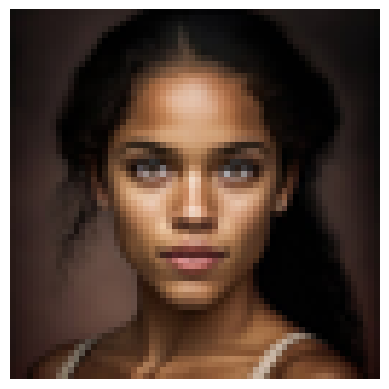

Prediction: Male


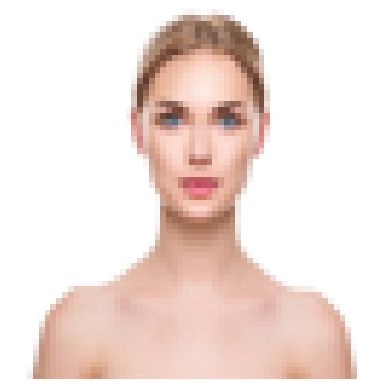

Prediction: Male


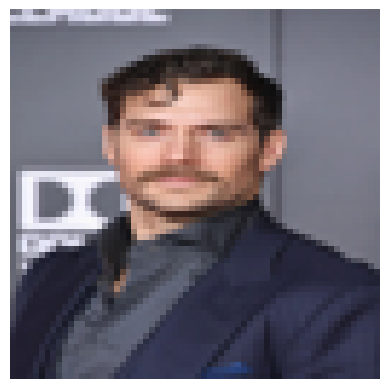

Prediction: Female


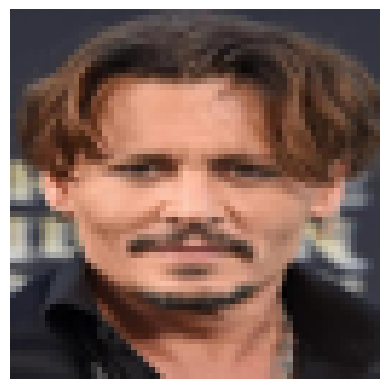

Prediction: Male


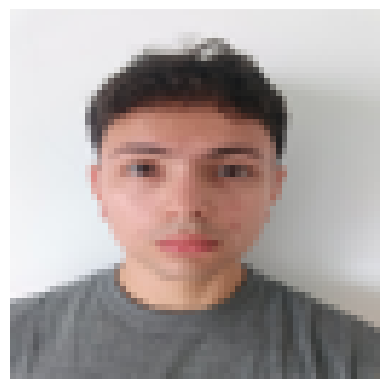

Prediction: Male


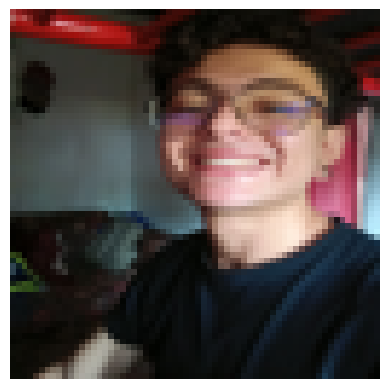

In [10]:
import matplotlib.pyplot as plt

for image, prediction in zip(external_samples_orig, external_samples_predictions):
    prediction = (prediction >= 0.5).astype(int)

    print(f"Prediction: {'Male' if prediction == 1 else 'Female'}")
    plt.imshow(image)
    plt.axis('off')
    plt.show()